# Projet SDATA

## Exercice 1

In [42]:
import datetime

import numpy as np
import pandas

dataset_train = pandas.read_csv("dataset/spotify_dataset_train.csv")
dataset_test = pandas.read_csv("dataset/spotify_dataset_test.csv")

GENRE_MAP = ['blues', 'chanson', 'classical', 'country', 'dance', 'disco', 'edm', 'electro', 'folk', 'hip hop', 'jazz',
             'latin', 'metal', 'pop', 'punk', 'r&b', 'rap', 'reggae', 'rock', 'salsa', 'soul', 'techno']

for i, date in enumerate(dataset_train['release_date']):
    if len(date.split('-')) == 3:
        dataset_train.loc[i, 'release_date'] = datetime.datetime.strptime(date, "%Y-%m-%d").replace(
            tzinfo=datetime.timezone.utc).timestamp()
    elif len(date.split('-')) == 2:
        dataset_train.loc[i, 'release_date'] = datetime.datetime.strptime(date, "%Y-%m").replace(
            tzinfo=datetime.timezone.utc).timestamp()
    elif len(date.split('-')) == 1:
        dataset_train.loc[i, 'release_date'] = datetime.datetime.strptime(date, "%Y").replace(
            tzinfo=datetime.timezone.utc).timestamp()
    else:
        print(date)
    dataset_train.loc[i, 'genre'] = GENRE_MAP.index(dataset_train.loc[i, 'genre'])

for i, date in enumerate(dataset_test['release_date']):
    if len(date.split('-')) == 3:
        dataset_test.loc[i, 'release_date'] = datetime.datetime.strptime(date, "%Y-%m-%d").replace(
            tzinfo=datetime.timezone.utc).timestamp()
    elif len(date.split('-')) == 2:
        dataset_test.loc[i, 'release_date'] = datetime.datetime.strptime(date, "%Y-%m").replace(
            tzinfo=datetime.timezone.utc).timestamp()
    elif len(date.split('-')) == 1:
        dataset_test.loc[i, 'release_date'] = datetime.datetime.strptime(date, "%Y").replace(
            tzinfo=datetime.timezone.utc).timestamp()
    else:
        print(date)
    #dataset_test.loc[i, 'genre'] = GENRE_MAP.index(dataset_test.loc[i, 'genre'])

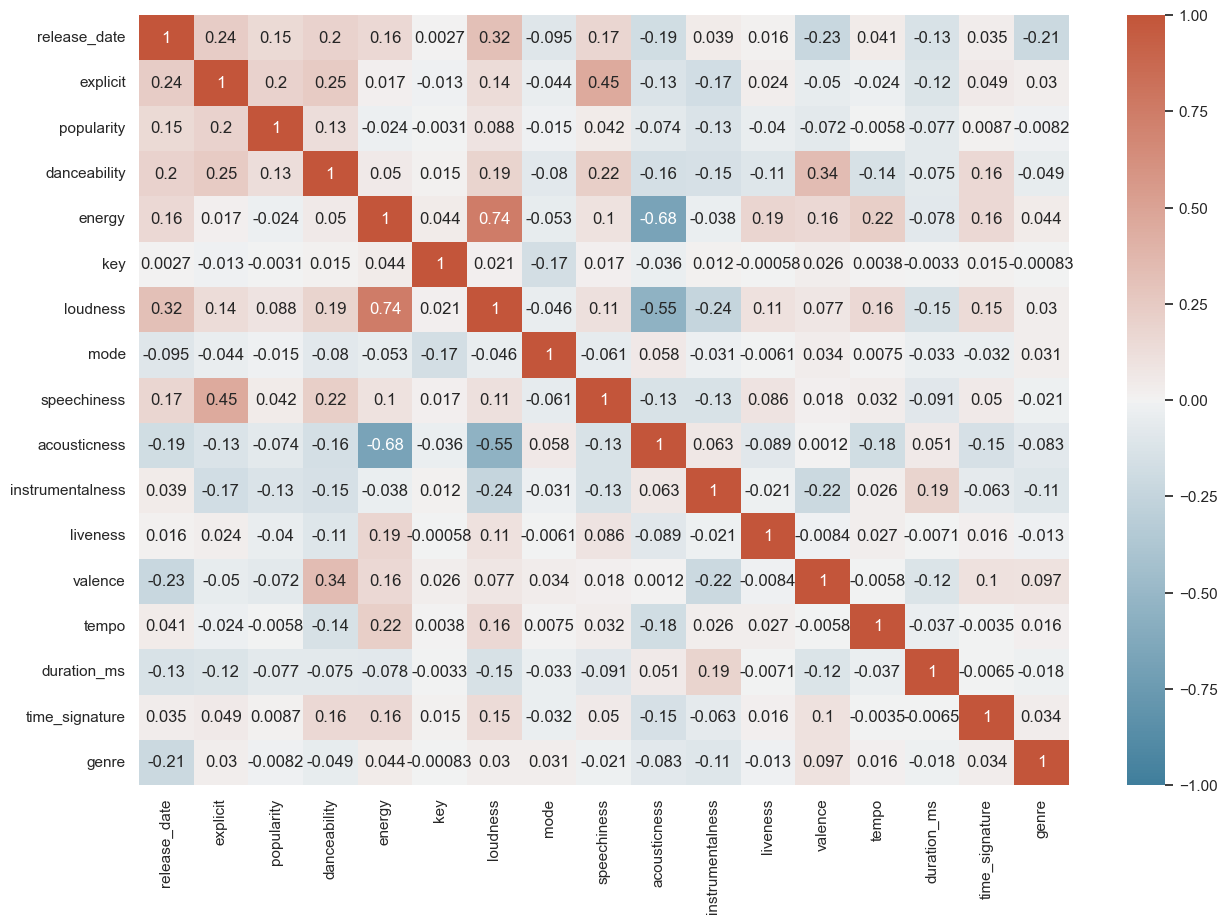

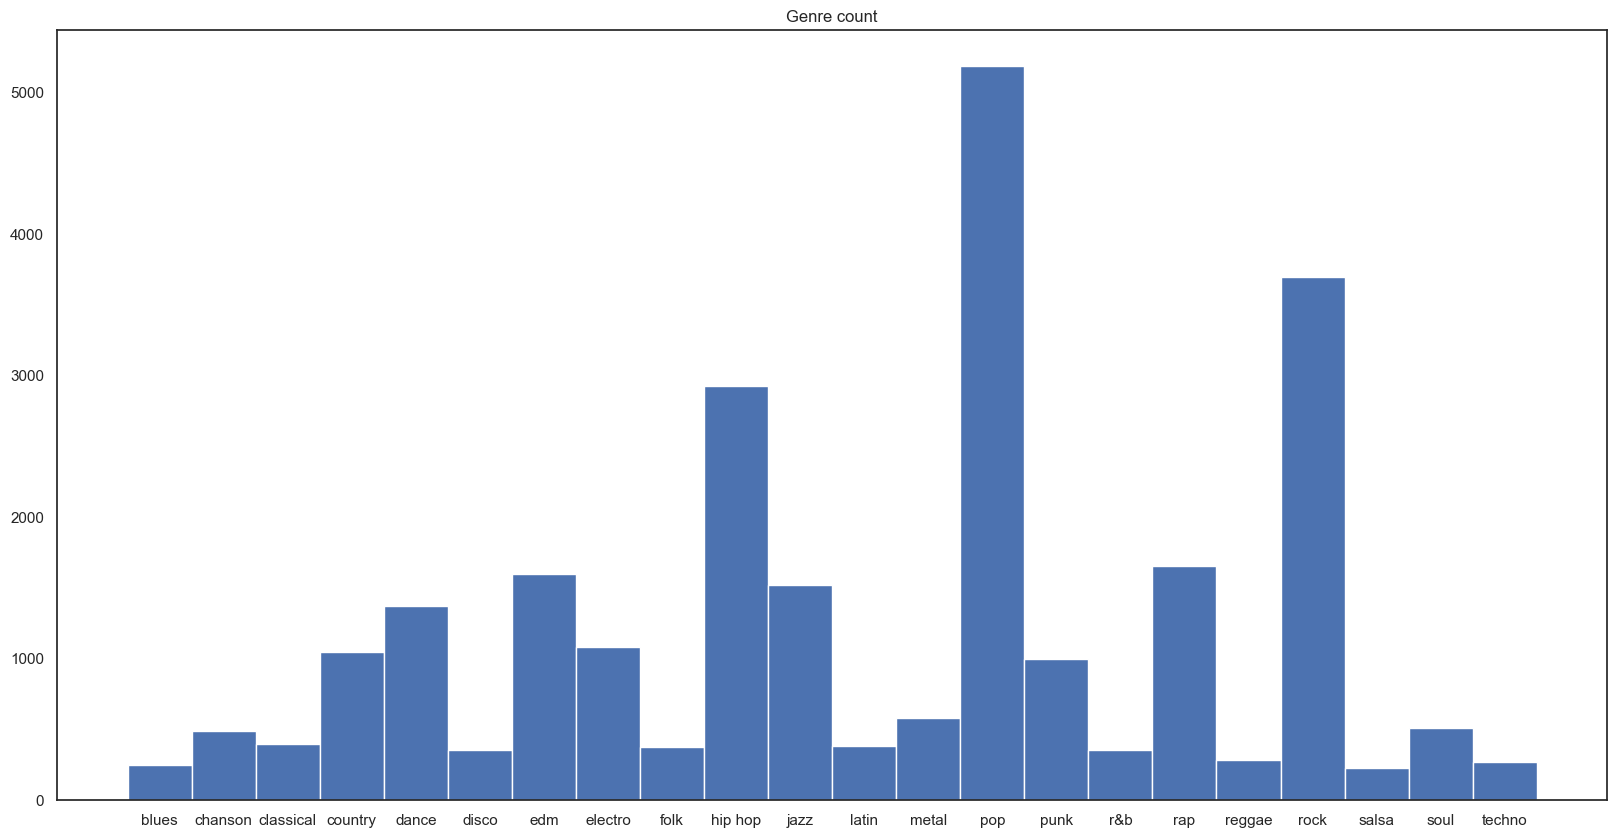

release_date        930136039.02439
explicit                        0.0
popularity                12.252033
danceability               0.577589
energy                     0.440676
key                        4.894309
loudness                 -10.564085
mode                       0.760163
speechiness                0.063946
acousticness               0.696233
instrumentalness           0.053705
liveness                   0.165473
valence                    0.658028
tempo                    119.846679
duration_ms           180374.833333
time_signature             3.804878
genre                           0.0
dtype: object


,release_date,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,1435017600.0,False,38,0.509,0.8720,2,-5.170,1,0.0547,0.0396,0.000015,0.3310,0.4860,95.969,194375,4,3
1,1636675200.0,False,58,0.182,0.0377,11,-33.748,0,0.0391,0.9870,0.957000,0.0804,0.0923,100.482,241804,4,2
2,1371772800.0,False,36,0.550,0.9410,0,-3.128,0,0.0849,0.0182,0.003750,0.3120,0.3510,145.006,260276,4,16
3,1346716800.0,False,0,0.569,0.7190,6,-8.399,0,0.0663,0.8670,0.941000,0.1760,0.6430,145.118,165200,4,0
4,1199145600.0,False,0,0.631,0.6610,8,-5.694,1,0.0558,0.0146,0.720000,0.3650,0.3300,130.004,245933,4,4


In [92]:
from matplotlib import pyplot as plt
import seaborn

# Correlation
corr = dataset_train.corr()
plt.figure(figsize=(15,10))
seaborn.heatmap(corr,
                cmap=seaborn.diverging_palette(230, 20, as_cmap=True),
                vmin=-1.0, vmax=1.0,
                square=False, annot=True)


# Genre count
plt.figure(figsize=(20,10))
genre_counts = [np.count_nonzero(dataset_train['genre'] == x) for x in range(len(GENRE_MAP))]
plt.bar(GENRE_MAP, genre_counts, width=1, align='center')
plt.title('Genre count')

plt.show()

print(np.mean(dataset_train.iloc[np.where(dataset_train['genre'] == 0)], axis=0))
dataset_train.head()